Модульна контрольна робота 1
Третяк Вікторії

In [1]:
# Importing the libraries
# Імпортуємо необхідні бібліотеки
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
# Завантажимо вихідні дані
df = pd.read_csv('Tretiak_modul.csv', sep=';')

In [3]:
# Виведемо дані, щоб перевірити чи нормально завантажились дані
df

,ActualPower,Max Capacity,Location 1,Location 3,Location 5,Location 7
0,3.742,45.0,2.9,4.442,4.495,4.681
1,3.510,45.0,3.5,4.281,4.335,4.522
2,3.652,45.0,4.0,4.096,4.153,4.341
3,3.881,45.0,4.2,3.905,3.960,4.143
4,4.135,45.0,2.9,3.725,3.773,3.948
...,...,...,...,...,...,...
320,1.416,45.0,4.1,3.917,3.899,3.778
321,0.723,45.0,5.1,4.109,4.112,3.990
322,0.505,45.0,5.0,4.308,4.340,4.223
323,0.447,45.0,4.3,4.475,4.542,4.439


In [4]:
#Виведемо описову статистику даних
df.describe()

,ActualPower,Max Capacity,Location 1,Location 3,Location 5,Location 7
count,324.000000,324.000000,324.000000,325.000000,323.000000,324.000000
mean,13.286593,44.815586,6.785802,5.128582,5.164198,5.182929
std,12.677422,0.655812,3.688479,2.603512,2.605965,2.560248
min,0.011000,41.250000,0.000000,0.068000,0.056000,0.046000
25%,3.328250,45.000000,4.200000,2.806000,2.984500,3.014750
50%,7.667500,45.000000,5.950000,5.781000,5.749000,5.529000
75%,22.426500,45.000000,8.725000,7.315000,7.378500,7.354250
max,42.301000,45.000000,18.900000,9.344000,9.352000,9.361000


Отже, у нас є набір даних з 6-ти змінними, 325 спостереженнями. Залежною змінною є ActualPower. Практично в усіх стовпцях, окрім Location 3 є пропуски. Їх необхідно буде заповнити. Але для початку побудуємо розподіл даних для кожної зі змінних, щоб визначити чи вони нормально розподілені, потребують чи ні вони певних перертворень.

<AxesSubplot:ylabel='Frequency'>

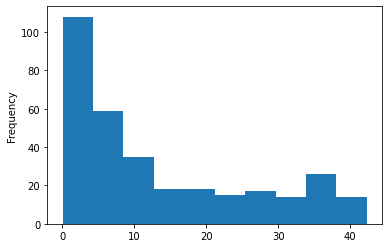

In [5]:
# ActualPower distribution
df['ActualPower'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

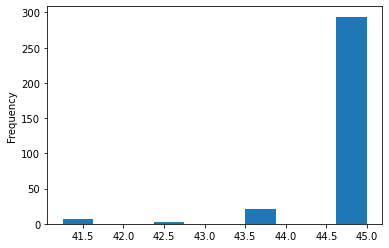

In [6]:
# Max Capacity distribution
df['Max Capacity'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

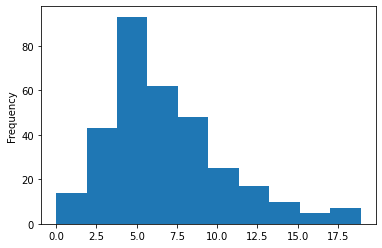

In [7]:
# Location 1 distribution
df['Location 1'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

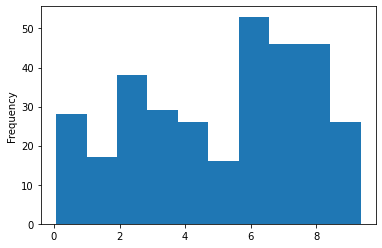

In [8]:
# Location 3 distribution
df['Location 3'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

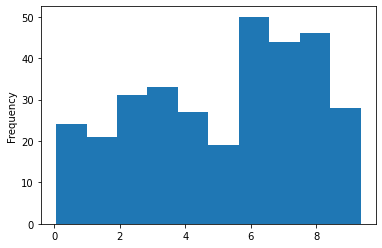

In [9]:
# Location 5 distribution
df['Location 5'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

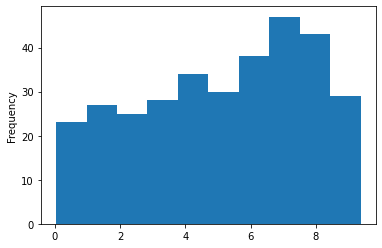

In [10]:
# Location 7 distribution
df['Location 7'].plot(kind = 'hist')

З отриманих результатів помітно, що наша залежна змінна ActualPower має ненормальний розподіл даних і її необхідно замінити на логарифм від поточного значення. Виконаємо заміну

In [11]:
df['ActualPower'] = np.log(df['ActualPower'])

<AxesSubplot:ylabel='Frequency'>

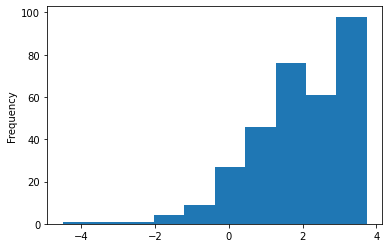

In [12]:
#Переглянемо як наразі розподіляються дані в даній змінній
df['ActualPower'].plot(kind = 'hist')

In [13]:
#Виведемо описову статистику даних
df.describe()

,ActualPower,Max Capacity,Location 1,Location 3,Location 5,Location 7
count,324.000000,324.000000,324.000000,325.000000,323.000000,324.000000
mean,1.940197,44.815586,6.785802,5.128582,5.164198,5.182929
std,1.360064,0.655812,3.688479,2.603512,2.605965,2.560248
min,-4.509860,41.250000,0.000000,0.068000,0.056000,0.046000
25%,1.202445,45.000000,4.200000,2.806000,2.984500,3.014750
50%,2.036989,45.000000,5.950000,5.781000,5.749000,5.529000
75%,3.110233,45.000000,8.725000,7.315000,7.378500,7.354250
max,3.744811,45.000000,18.900000,9.344000,9.352000,9.361000


Як бачимо з отриманої сатистики, в змінних 'ActualPower', 'Max Capacity' присутні значення які менші ніж mean()-3*std. У змінній 'Location 1' присутні значення, які не потрапляють в межі верхньої границі. Замінимо такі значення на граничні 

In [14]:
ActualPower = []
for ActualPower1 in df['ActualPower']:
    if ActualPower1 < round(df['ActualPower'].mean() - 3 * df['ActualPower'].std()):
        ActualPower1 = round(df['ActualPower'].mean() - 3*df['ActualPower'].std())
    ActualPower.append(ActualPower1)
df['ActualPower']  = ActualPower

Capacity = []
for Capacity1 in df['Max Capacity']:
    if Capacity1 < round(df['Max Capacity'].mean() - 3 * df['Max Capacity'].std()):
        Capacity1 = round(df['Max Capacity'].mean() - 3*df['Max Capacity'].std())
    Capacity.append(Capacity1)
df['Max Capacity']  = Capacity

Location = []
for Location1 in df['Location 1']:
    if Location1 > round(df['Location 1'].mean() + 3 * df['Location 1'].std()):
        Location1 = round(df['Location 1'].mean() + 3*df['Location 1'].std())
    Location.append(Location1)
df['Location 1']  = Location

In [15]:
# Тепер замінимо пропущені дані середніми значеннями
from sklearn.impute import SimpleImputer

imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean').fit(df[['ActualPower']])
df[['ActualPower']] = imputer_mean.fit_transform(df[['ActualPower']])

imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean').fit(df[['Max Capacity']])
df[['Max Capacity']] = imputer_mean.fit_transform(df[['Max Capacity']])

imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean').fit(df[['Location 1']])
df[['Location 1']] = imputer_mean.fit_transform(df[['Location 1']])

imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean').fit(df[['Location 5']])
df[['Location 5']] = imputer_mean.fit_transform(df[['Location 5']])

imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean').fit(df[['Location 7']])
df[['Location 7']] = imputer_mean.fit_transform(df[['Location 7']])

In [16]:
# Експортуємо наші підготовлені дані в окремий файл
df.to_csv('Tretiak_modul_prep.csv', sep=';', index=False)

Дані підготовані. Тепер можемо перейти до побудови моделей регресії.
Спочатку будемо будувати просту лінійну модель.
Для цього перш за все необхідно визначити яку змінну необхідно брати в якості незалежної.

In [18]:
# Побудуємо кореляційну матрицю та графік кореляції між змінними
df.corr()

,ActualPower,Max Capacity,Location 1,Location 3,Location 5,Location 7
ActualPower,1.000000,-0.324577,0.431499,0.438061,0.438510,0.472716
Max Capacity,-0.324577,1.000000,-0.220094,-0.205126,-0.232158,-0.281462
Location 1,0.431499,-0.220094,1.000000,0.730431,0.710891,0.700241
Location 3,0.438061,-0.205126,0.730431,1.000000,0.990100,0.977085
Location 5,0.438510,-0.232158,0.710891,0.990100,1.000000,0.983533
Location 7,0.472716,-0.281462,0.700241,0.977085,0.983533,1.000000


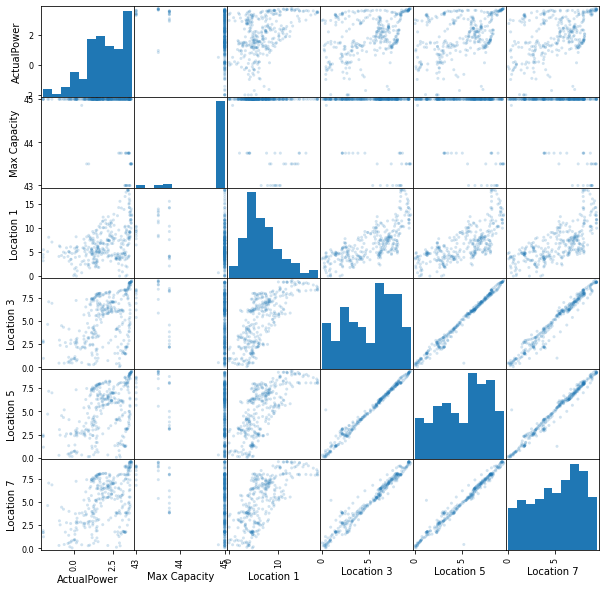

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(10, 10))
plt.show()

З отриманих результатів помітно, що найбільший коефіцієнт кореляції з ActualPower спостерігається в 'Location 7'
Варто зазначити, що в випадку побудов множинної регресії від усіх можливих незалежних змінних, в нашій моделі буде присутня мультиколінеарність (про це свідчать високі значення коефіцієнтів кореляції між змінними розташування)

In [20]:
# Розіб'ємо наші дані на тренувальну і тестові вибірки
X = df.iloc[:, 1:].values
y = df.iloc[:, 0:1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [21]:
# Побудуємо просту лінійну регресію залежності 'ActualPower' від 'Location 7'
from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[:, 4:], y_train)

In [22]:
# Отримуємо коефіцієнти регресії
sr.coef_, sr.intercept_
# Рівняння регресії має вигляд: y =0.236*x + 0.77

(array([[0.23622358]]), array([0.77876367]))

In [23]:
# Побудуємо прогнозні значення для даної моделі на тестових даних
y_pred = sr.predict(X_test[:, 4:])

In [24]:
# Обчислимо коефіцієнти детермінації для кожної із вибірок
sr.score(X_train[:, 4:], y_train), sr.score(X_test[:, 4:], y_test)

(0.22695137409238164, 0.18894707001505384)

Коефіцієнти детермінації є низькими. Дана модель не може бути застосована для прогнозування даних.

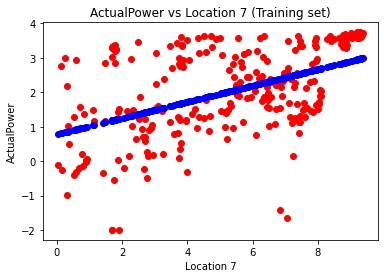

In [25]:
# Visualising the Training set results
plt.scatter(X_train[:,4], y_train, color = 'red')
plt.plot(X_train[:,4], sr.predict(X_train[:, 4:]), 'bo')
plt.title('ActualPower vs Location 7 (Training set)')
plt.xlabel('Location 7')
plt.ylabel('ActualPower')
plt.show()

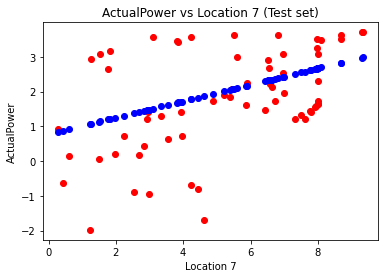

In [26]:
# Visualising the Test set results
plt.scatter(X_test[:,4], y_test, color = 'red')
plt.plot(X_test[:,4], sr.predict(X_test[:, 4:]), 'bo')
plt.title('ActualPower vs Location 7 (Test set)')
plt.xlabel('Location 7')
plt.ylabel('ActualPower')
plt.show()

In [27]:
# Обчислимо середньоквадратичні помилки для даної моделі
from sklearn.metrics import mean_squared_error
mse_sr_train = mean_squared_error(sr.predict(X_train[:, 4:]), y_train)
mse_sr_test = mean_squared_error(sr.predict(X_test[:, 4:]), y_test)

Тепер побудуємо множинну лінійну регресію. В якості незалежних змінних візьмемо всі 5

In [28]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
mr = LinearRegression().fit(X_train, y_train)

In [29]:
# Getting parameters
mr.coef_, mr.intercept_
# Рівняння мнодинної лінійної регресії має наступний вигляд:
# -0.388*х1 + 0.813*х2 - 0.345*х3 + 0.018*х4 + 0.457*х5 + 18.161

(array([[-0.38781324,  0.08125648, -0.34527655,  0.01757815,  0.45663073]]),
 array([18.1605036]))

In [30]:
# Predicting the Test set results
y_pred = mr.predict(X_test)

In [31]:
# Обчислимо коефіцієнти детермінації R^2 для кожної із вибірок
mr.score(X_train, y_train), mr.score(X_test, y_test)

(0.29499392952382497, 0.2461966274407873)

Отримані значення коефіцієнтів детермінації є трохи вищими, ніж в попередньої простої лінійної моделі, але все одно залишаються незадовільно низькими для можливості їх використання на практиці.

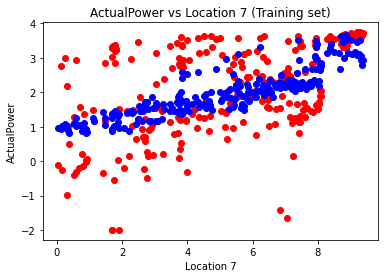

In [32]:
# Visualising the Training set results
plt.scatter(X_train[:,4], y_train, color = 'red')
plt.plot(X_train[:,4], mr.predict(X_train), 'bo')
plt.title('ActualPower vs Location 7 (Training set)')
plt.xlabel('Location 7')
plt.ylabel('ActualPower')
plt.show()

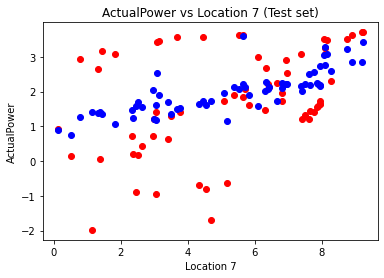

In [33]:
# Visualising the Test set results
plt.scatter(X_test[:,3], y_test, color = 'red')
plt.plot(X_test[:,3], mr.predict(X_test), 'bo')
plt.title('ActualPower vs Location 7 (Test set)')
plt.xlabel('Location 7')
plt.ylabel('ActualPower')
plt.show()

На графіках помітно, що множинна модель краще описує та прогнозує дані в порівнянні з простою лінійною

In [34]:
# Обчислимо середньоквадратичні помилки для даної моделі
from sklearn.metrics import mean_squared_error
mse_mr_train = mean_squared_error(mr.predict(X_train), y_train)
mse_mr_test = mean_squared_error(mr.predict(X_test), y_test)

Далі побудуємо просту поліноміальну модель. В якості незалежних зміних у нас буде 'Location 7' та її квадрат

In [35]:
# Створюємо датасет для побудови поліноміальної моделі
from sklearn.preprocessing import PolynomialFeatures
X_train_p = PolynomialFeatures().fit_transform(X_train[:, 4:])
X_test_p = PolynomialFeatures().fit_transform(X_test[:, 4:])
pr = LinearRegression().fit(X_train_p[:,1:], y_train)

In [36]:
# Отримуємо коефіцієнти регресії
pr.coef_, pr.intercept_
# Рівняння регресії має вигляд: y = 0.135*х + 0.01*х^2 + 0.955

(array([[0.13504224, 0.01043502]]), array([0.95455216]))

In [37]:
# Predicting the Test set results
y_pred = pr.predict(X_test_p[:,1:])

In [38]:
# Обчислимо коефіцієнти детермінації R^2 для кожної із вибірок
pr.score(X_train_p[:,1:], y_train), pr.score(X_test_p[:,1:], y_test)

(0.22955112299698388, 0.19207229854778252)

Коефіцієнти детермінації для даної моделі також є низькими. В порівнянні з простою лінійною моделлю, то дана є трохи кращою, але за якістю поступається множинній лінійній регресії. 

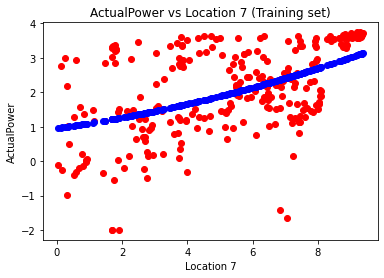

In [39]:
# Visualising the Training set results
plt.scatter(X_train[:,4], y_train, color = 'red')
plt.plot(X_train[:,4], pr.predict(X_train_p[:,1:]), 'bo')
plt.title('ActualPower vs Location 7 (Training set)')
plt.xlabel('Location 7')
plt.ylabel('ActualPower')
plt.show()

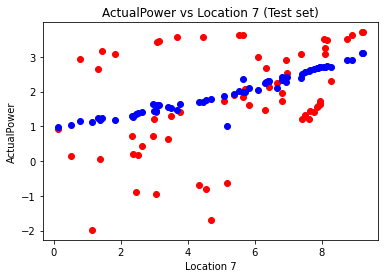

In [40]:
# Visualising the Test set results
plt.scatter(X_test[:,3], y_test, color = 'red')
plt.plot(X_test[:,3], pr.predict(X_test_p[:,1:]), 'bo')
plt.title('ActualPower vs Location 7 (Test set)')
plt.xlabel('Location 7')
plt.ylabel('ActualPower')
plt.show()

In [41]:
# Обчислимо середньоквадратичні помилки для даної моделі
from sklearn.metrics import mean_squared_error
mse_pr_train = mean_squared_error(pr.predict(X_train_p[:,1:]), y_train)
mse_pr_test = mean_squared_error(pr.predict(X_test_p[:,1:]), y_test)

In [42]:
# Проведемо Backward Elimination with p-values
import statsmodels.api as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
         
SL = 0.05
X_opt = X_train[:, [0, 1, 2, 3, 4]]
y = y_train
X_Modeled = backwardElimination(X_opt, SL)

In [43]:
X_Modeled

array([[43.75 ,  3.8  ,  2.512,  3.998],
       [45.   , 13.3  ,  9.098,  9.303],
       [45.   ,  3.4  ,  5.074,  4.768],
       ...,
       [45.   ,  7.4  ,  7.131,  7.256],
       [43.75 ,  4.1  ,  3.285,  4.87 ],
       [45.   ,  3.3  ,  1.966,  2.35 ]])

In [44]:
X_opt

array([[43.75 ,  3.8  ,  2.512,  3.225,  3.998],
       [45.   , 13.3  ,  9.098,  9.088,  9.303],
       [45.   ,  3.4  ,  5.074,  4.878,  4.768],
       ...,
       [45.   ,  7.4  ,  7.131,  7.143,  7.256],
       [43.75 ,  4.1  ,  3.285,  3.864,  4.87 ],
       [45.   ,  3.3  ,  1.966,  2.349,  2.35 ]])

З отриманих даних помітно, що в моделі можна залишити всі змінні, окрім 'Location 5'

In [45]:
# Для початку створимо датафрейм, в якому будуть міститись лише необхідні нам змінні
df1 = df[['ActualPower', 'Max Capacity', 'Location 1', 'Location 3', 'Location 7']]
# Розіб'ємо записані дані на тренувальну і тестові вибірки
X1 = df1.iloc[:, 1:].values
y1 = df1.iloc[:, 0:1].values
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=1)

In [46]:
# Fitting Optimized Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
omr = LinearRegression().fit(X_train1[:, 0:4], y_train1)

In [47]:
# Getting parameters
omr.coef_, omr.intercept_
# Рівняння мнодинної лінійної регресії має наступний вигляд:
# -0.388*х1 + 0.809*х2 - 0.333*х3 + 0.463*х5 + 18.175

(array([[-0.38815165,  0.08093224, -0.3331628 ,  0.46266725]]),
 array([18.17488669]))

In [48]:
# Predicting the Test set results
y_pred = omr.predict(X_test1)

In [49]:
# Обчислимо коефіцієнти детермінації R^2 для кожної із вибірок
omr.score(X_train1, y_train1), omr.score(X_test1, y_test1)

(0.29498946320452224, 0.249179075905679)

З усіх розглянутих на даний момент моделей, дана оптимізована моделб має найбільші значення коефіцієнтів детермінації для обох вибірок. Проте значення коефіцієнтів залишаються незадовільно низькими і не можуть дозволити використовувати дану модель на практиці. Варто зазначити, що в усіх лінійних моделях спостерігається проблема, що дані перенавчені, оскільки коефіцієнт детермінації на тренувальних даних є вижчим, ніж на тестових. Тобто моделі є перенавченими.

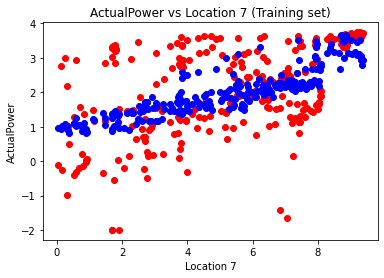

In [50]:
plt.scatter(X_train1[:,3], y_train1, color = 'red')
plt.plot(X_train1[:,3], omr.predict(X_train1), 'bo')
plt.title('ActualPower vs Location 7 (Training set)')
plt.xlabel('Location 7')
plt.ylabel('ActualPower')
plt.show()

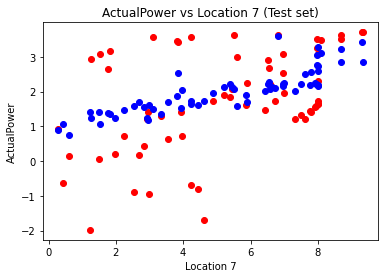

In [51]:
plt.scatter(X_test1[:,3], y_test1, color = 'red')
plt.plot(X_test1[:,3], omr.predict(X_test1), 'bo')
plt.title('ActualPower vs Location 7 (Test set)')
plt.xlabel('Location 7')
plt.ylabel('ActualPower')
plt.show()

In [52]:
# Обчислимо середньоквадратичні помилки для даної моделі
from sklearn.metrics import mean_squared_error
mse_omr_train = mean_squared_error(omr.predict(X_train1), y_train1)
mse_omr_test = mean_squared_error(omr.predict(X_test1), y_test1)

Далі змоделюємо дані за допомогою дерева рішень. Спочатку розглянемо модель, в якій в якості незалежної змінної буде виступати лише 'Location 7'

In [53]:
# Fitting Tree to the Training set (Income)
from sklearn.tree import DecisionTreeRegressor
sdt = DecisionTreeRegressor(max_depth=4).fit(X_train[:, 4:], y_train)

Методом перебору було вибрано в якості максимальної кіл-сті гілок обрати 4, так за таких умов коефіцієнт детермінації тестової вибірки був найбільшим і різниця між коефіцієнтами тренувальної і тестової була відносно не надто великою.

In [54]:
# Predicting the Test set results
y_pred = sdt.predict(X_test[:, 4:])

In [55]:
# Coefficient of determination R^2
sdt.score(X_train[:, 4:], y_train), sdt.score(X_test[:, 4:], y_test)

(0.4448206943528137, 0.33229800671951515)

В даній моделі також спостерігається проблема перенавчання. Загалом значення коефіцієнтів детермінації є вищими, ніж у лінійних моделей, але все одно залишається низькими

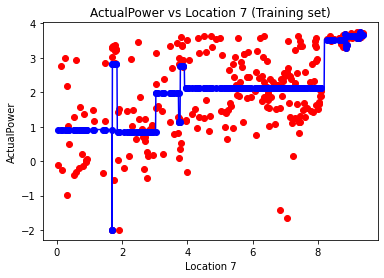

In [56]:
# Visualising the Training set results
X_grid = np.arange(min(X[:, 4:]), max(X[:, 4:]), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, sdt.predict(X_grid), color = 'blue')
plt.scatter(X_train[:,4], y_train, color = 'red')
plt.plot(X_train[:,4], sdt.predict(X_train[:, 4:]), 'bo')
plt.title('ActualPower vs Location 7 (Training set)')
plt.xlabel('Location 7')
plt.ylabel('ActualPower')
plt.show()

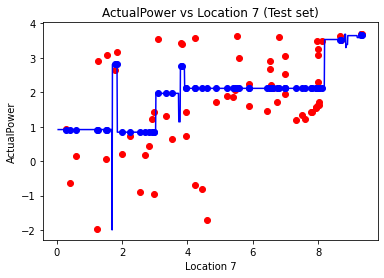

In [57]:
# Visualising the Test set results
X_grid = np.arange(min(X[:, 4:]), max(X[:, 4:]), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, sdt.predict(X_grid), color = 'blue')
plt.scatter(X_test[:,4], y_test, color = 'red')
plt.plot(X_test[:,4], sdt.predict(X_test[:, 4:]), 'bo')
plt.title('ActualPower vs Location 7 (Test set)')
plt.xlabel('Location 7')
plt.ylabel('ActualPower')
plt.show()

In [58]:
# Обчислимо середньоквадратичні помилки для даної моделі
from sklearn.metrics import mean_squared_error
mse_sdt_train = mean_squared_error(sdt.predict(X_train[:, 4:]), y_train)
mse_sdt_test = mean_squared_error(sdt.predict(X_test[:, 4:]), y_test)

Тепер розглянемо модель дерева рішень, в якій декілька незалежних змінних. В якості регресорів будемо використовувати ті змінні, які були включені до оптимальної множинної регресії

In [59]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=3).fit(X_train1, y_train1)

Методом перебору було вибрано в якості максимальної кіл-сті гілок обрати 3, так за таких умов спостерігається найвище значення на тестовій вибірці.

In [60]:
# Predicting the Test set results
y_pred = dt.predict(X_test1)

In [61]:
# Coefficient of determination R^2
dt.score(X_train1, y_train1), dt.score(X_test1, y_test1)

(0.3862686852541557, 0.30940434670271044)

Загалом значення коефіцієнтів детермінації є вищими, ніж у лінійних моделей, але разом з тим поступаються значенням простого дерева рішень.

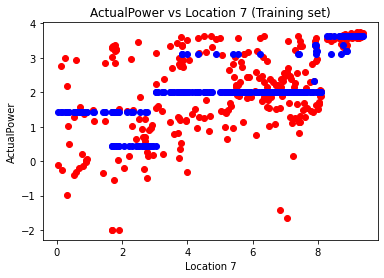

In [62]:
# Visualising the Training set results
plt.scatter(X_train1[:,3], y_train1, color = 'red')
plt.plot(X_train1[:,3], dt.predict(X_train1), 'bo')
plt.title('ActualPower vs Location 7 (Training set)')
plt.xlabel('Location 7')
plt.ylabel('ActualPower')
plt.show()

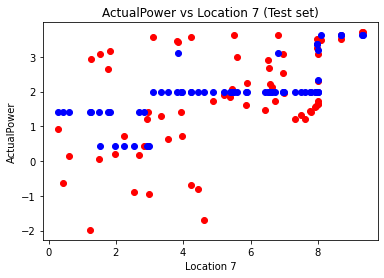

In [63]:
# Visualising the Test set results
plt.scatter(X_test1[:,3], y_test1, color = 'red')
plt.plot(X_test1[:,3], dt.predict(X_test1), 'bo')
plt.title('ActualPower vs Location 7 (Test set)')
plt.xlabel('Location 7')
plt.ylabel('ActualPower')
plt.show()

In [64]:
# Обчислимо середньоквадратичні помилки для даної моделі
from sklearn.metrics import mean_squared_error
mse_dt_train = mean_squared_error(dt.predict(X_train1), y_train1)
mse_dt_test = mean_squared_error(dt.predict(X_test1), y_test1)

Тепер розглянемо модель випадкового лісу, в якій декілька незалежних змінних. В якості регресорів будемо використовувати ті змінні, які були включені до оптимальної множинної регресії

In [65]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 4, random_state = 0, max_depth=6).fit(X_train1, y_train1)

C:\Users\38095\anaconda3\envs\labvika\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Методом перебору була вибрана дана архітектура, так як за таких умов спостерігається найвище значення коефіцієнта детермінації тестової вибірки

In [66]:
# Predicting the Test set results
y_pred = rf.predict(X_test1)

In [67]:
# Coefficient of determination R^2
rf.score(X_train1, y_train1), rf.score(X_test1, y_test1)

(0.6651590473628539, 0.4124421598320066)

Серед усіх розглянутих моделей, в даної моделі найвищі значення коефіцієнтів детермінації, але вони є низькими.

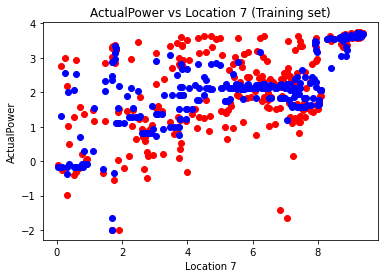

In [69]:
# Visualising the Training set results
plt.scatter(X_train1[:,3], y_train1, color = 'red')
plt.plot(X_train1[:,3], rf.predict(X_train1), 'bo')
plt.title('ActualPower vs Location 7 (Training set)')
plt.xlabel('Location 7')
plt.ylabel('ActualPower')
plt.show()

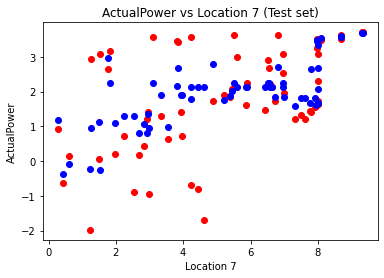

In [70]:
# Visualising the Test set results
plt.scatter(X_test1[:,3], y_test1, color = 'red')
plt.plot(X_test1[:,3], rf.predict(X_test1), 'bo')
plt.title('ActualPower vs Location 7 (Test set)')
plt.xlabel('Location 7')
plt.ylabel('ActualPower')
plt.show()

In [71]:
# Обчислимо середньоквадратичні помилки для даної моделі
from sklearn.metrics import mean_squared_error
mse_rf_train = mean_squared_error(rf.predict(X_train1), y_train1)
mse_rf_test = mean_squared_error(rf.predict(X_test1), y_test1)

Тепер для регресії застосуємо нейронні мережі. Побудуємо декілька варіантів моделей. Для побудови моделей будемо використовувати оптимальні змінні.

In [72]:
# Для початку відшкалюємо дані
# Feature Scaling
from sklearn.preprocessing import StandardScaler
df2 = df[['ActualPower', 'Max Capacity', 'Location 1', 'Location 3', 'Location 7']]
# Splitting the dataset into the Training set and Test set
X2 = df2.iloc[:, 1:].values
y2 = df2.iloc[:, :-4].values
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=1)
scalerX=StandardScaler().fit(X_train2)
scalerY=StandardScaler().fit(y_train2)
X_train2=scalerX.transform(X_train2)
y_train2=scalerY.transform(y_train2)
X_test2=scalerX.transform(X_test2)
y_test2=scalerY.transform(y_test2)

In [73]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input

Using TensorFlow backend.


In [74]:
# Initialising the ANN 
'''
Ініціалізуємо нейронну мережу з архітектурою 4-4-1
'''
rnn1 = Sequential()

# Adding the input layer and the first hidden layer
rnn1.add(Dense(output_dim = 4, activation = 'tanh', input_dim = 4))

# Adding the output layer
rnn1.add(Dense(1, activation='linear'))

# Compiling the ANN
rnn1.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

C:\Users\38095\anaconda3\envs\labvika\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", input_dim=4, units=4)`
  


In [75]:
# Fitting the ANN to the Training set
rnn1.fit(X_train2, y_train2, batch_size = 10, nb_epoch = 100)

C:\Users\38095\anaconda3\envs\labvika\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/100
260/260 [==============================] - 0s 842us/step - loss: 1.3624 - accuracy: 0.0000e+00
Epoch 2/100
260/260 [==============================] - 0s 184us/step - loss: 1.2506 - accuracy: 0.0000e+00
Epoch 3/100
260/260 [==============================] - 0s 184us/step - loss: 1.1594 - accuracy: 0.0000e+00
Epoch 4/100
260/260 [==============================] - 0s 200us/step - loss: 1.0839 - accuracy: 0.0000e+00
Epoch 5/100
260/260 [==============================] - 0s 193us/step - loss: 1.0239 - accuracy: 0.0000e+00
Epoch 6/100
260/260 [==============================] - 0s 200us/step - loss: 0.9769 - accuracy: 0.0000e+00
Epoch 7/100
260/260 [==============================] - 0s 195us/step - loss: 0.9390 - accuracy: 0.0000e+00
Epoch 8/100
260/260 [==============================] - 0s 193us/step - loss: 0.9105 - accuracy: 0.0000e+00
Epoch 9/100
260/260 [==============================] - 0s 169us/step - loss: 0.8898 - accuracy: 0.0000e+00
Epoch 10/100
260/260 [===============

Epoch 77/100
260/260 [==============================] - 0s 177us/step - loss: 0.7002 - accuracy: 0.0000e+00
Epoch 78/100
260/260 [==============================] - 0s 293us/step - loss: 0.6993 - accuracy: 0.0000e+00
Epoch 79/100
260/260 [==============================] - 0s 361us/step - loss: 0.6980 - accuracy: 0.0000e+00
Epoch 80/100
260/260 [==============================] - 0s 369us/step - loss: 0.7007 - accuracy: 0.0000e+00
Epoch 81/100
260/260 [==============================] - 0s 368us/step - loss: 0.6975 - accuracy: 0.0000e+00
Epoch 82/100
260/260 [==============================] - 0s 351us/step - loss: 0.6964 - accuracy: 0.0000e+00
Epoch 83/100
260/260 [==============================] - 0s 375us/step - loss: 0.6953 - accuracy: 0.0000e+00
Epoch 84/100
260/260 [==============================] - 0s 358us/step - loss: 0.6949 - accuracy: 0.0000e+00
Epoch 85/100
260/260 [==============================] - 0s 364us/step - loss: 0.6936 - accuracy: 0.0000e+00
Epoch 86/100
260/260 [======

In [76]:
# Predict the Training set results
y_modeled1=rnn1.predict(X_train2)
# Predicting the Test set results
y_pred1 = rnn1.predict(X_test2)

In [77]:
'''
Побудуємо нейронну мережу з архітектурою 4-4-4-1
'''
# Initialising the ANN 
rnn2 = Sequential()

# Adding the input layer and the first hidden layer
rnn2.add(Dense(output_dim = 4, activation = 'tanh', input_dim = 4))

# Adding the hidden layer
rnn2.add(Dense(4, activation='tanh'))

# Adding the output layer
rnn2.add(Dense(1, activation='linear'))

# Compiling the ANN
rnn2.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

C:\Users\38095\anaconda3\envs\labvika\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", input_dim=4, units=4)`
  


In [78]:
# Fitting the ANN to the Training set
rnn2.fit(X_train2, y_train2, batch_size = 10, nb_epoch = 100)

C:\Users\38095\anaconda3\envs\labvika\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/100
260/260 [==============================] - 0s 983us/step - loss: 0.9152 - accuracy: 0.0000e+00
Epoch 2/100
260/260 [==============================] - 0s 182us/step - loss: 0.8672 - accuracy: 0.0000e+00
Epoch 3/100
260/260 [==============================] - 0s 174us/step - loss: 0.8409 - accuracy: 0.0000e+00
Epoch 4/100
260/260 [==============================] - 0s 169us/step - loss: 0.8243 - accuracy: 0.0000e+00
Epoch 5/100
260/260 [==============================] - 0s 161us/step - loss: 0.8135 - accuracy: 0.0000e+00
Epoch 6/100
260/260 [==============================] - 0s 195us/step - loss: 0.8062 - accuracy: 0.0000e+00
Epoch 7/100
260/260 [==============================] - 0s 201us/step - loss: 0.8002 - accuracy: 0.0000e+00
Epoch 8/100
260/260 [==============================] - 0s 208us/step - loss: 0.7925 - accuracy: 0.0000e+00
Epoch 9/100
260/260 [==============================] - 0s 199us/step - loss: 0.7875 - accuracy: 0.0000e+00
Epoch 10/100
260/260 [===============

260/260 [==============================] - 0s 342us/step - loss: 0.6854 - accuracy: 0.0000e+00
Epoch 77/100
260/260 [==============================] - 0s 348us/step - loss: 0.6857 - accuracy: 0.0000e+00
Epoch 78/100
260/260 [==============================] - 0s 313us/step - loss: 0.6874 - accuracy: 0.0000e+00
Epoch 79/100
260/260 [==============================] - 0s 331us/step - loss: 0.6843 - accuracy: 0.0000e+00
Epoch 80/100
260/260 [==============================] - 0s 319us/step - loss: 0.6848 - accuracy: 0.0000e+00
Epoch 81/100
260/260 [==============================] - 0s 382us/step - loss: 0.6836 - accuracy: 0.0000e+00
Epoch 82/100
260/260 [==============================] - 0s 388us/step - loss: 0.6849 - accuracy: 0.0000e+00
Epoch 83/100
260/260 [==============================] - 0s 403us/step - loss: 0.6837 - accuracy: 0.0000e+00
Epoch 84/100
260/260 [==============================] - 0s 369us/step - loss: 0.6851 - accuracy: 0.0000e+00
Epoch 85/100
260/260 [===================

In [79]:
# Predict the Training set results
y_modeled2=rnn2.predict(X_train2)
# Predicting the Test set results
y_pred2 = rnn2.predict(X_test2)

In [80]:
'''
Побудуємо нейронну мережу з архітектурою 4-6-1
'''
# Initialising the ANN 
rnn3 = Sequential()

# Adding the input layer and the first hidden layer
rnn3.add(Dense(output_dim = 6, activation = 'tanh', input_dim = 4))

# Adding the output layer
rnn3.add(Dense(1, activation='linear'))

# Compiling the ANN
rnn3.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

C:\Users\38095\anaconda3\envs\labvika\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", input_dim=4, units=6)`
  


In [81]:
# Fitting the ANN to the Training set
rnn3.fit(X_train2, y_train2, batch_size = 10, nb_epoch = 100)

C:\Users\38095\anaconda3\envs\labvika\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/100
260/260 [==============================] - 0s 682us/step - loss: 2.4938 - accuracy: 0.0000e+00
Epoch 2/100
260/260 [==============================] - 0s 167us/step - loss: 2.2241 - accuracy: 0.0000e+00
Epoch 3/100
260/260 [==============================] - 0s 153us/step - loss: 1.9657 - accuracy: 0.0000e+00
Epoch 4/100
260/260 [==============================] - 0s 161us/step - loss: 1.7258 - accuracy: 0.0000e+00
Epoch 5/100
260/260 [==============================] - 0s 154us/step - loss: 1.5066 - accuracy: 0.0000e+00
Epoch 6/100
260/260 [==============================] - 0s 164us/step - loss: 1.3151 - accuracy: 0.0000e+00
Epoch 7/100
260/260 [==============================] - 0s 179us/step - loss: 1.1550 - accuracy: 0.0000e+00
Epoch 8/100
260/260 [==============================] - 0s 198us/step - loss: 1.0327 - accuracy: 0.0000e+00
Epoch 9/100
260/260 [==============================] - 0s 192us/step - loss: 0.9337 - accuracy: 0.0000e+00
Epoch 10/100
260/260 [===============

260/260 [==============================] - 0s 354us/step - loss: 0.6616 - accuracy: 0.0000e+00
Epoch 77/100
260/260 [==============================] - 0s 364us/step - loss: 0.6625 - accuracy: 0.0000e+00
Epoch 78/100
260/260 [==============================] - 0s 371us/step - loss: 0.6596 - accuracy: 0.0000e+00
Epoch 79/100
260/260 [==============================] - 0s 373us/step - loss: 0.6605 - accuracy: 0.0000e+00
Epoch 80/100
260/260 [==============================] - 0s 377us/step - loss: 0.6594 - accuracy: 0.0000e+00
Epoch 81/100
260/260 [==============================] - 0s 374us/step - loss: 0.6592 - accuracy: 0.0000e+00
Epoch 82/100
260/260 [==============================] - 0s 377us/step - loss: 0.6611 - accuracy: 0.0000e+00
Epoch 83/100
260/260 [==============================] - 0s 374us/step - loss: 0.6586 - accuracy: 0.0000e+00
Epoch 84/100
260/260 [==============================] - 0s 369us/step - loss: 0.6573 - accuracy: 0.0000e+00
Epoch 85/100
260/260 [===================

In [82]:
# Predict the Training set results
y_modeled3=rnn3.predict(X_train2)
# Predicting the Test set results
y_pred3 = rnn3.predict(X_test2)

In [83]:
# Inversing scaling
from sklearn.preprocessing import StandardScaler
y_modeled1 = scalerY.inverse_transform(y_modeled1)
y_modeled2 = scalerY.inverse_transform(y_modeled2)
y_modeled3 = scalerY.inverse_transform(y_modeled3)

y_pred1 = scalerY.inverse_transform(y_pred1)
y_pred2 = scalerY.inverse_transform(y_pred2)
y_pred3 = scalerY.inverse_transform(y_pred3)

y_train = scalerY.inverse_transform(y_train2)
X_train = scalerX.inverse_transform(X_train2)
y_test = scalerY.inverse_transform(y_test2)
X_test = scalerX.inverse_transform(X_test2)

Тепер обчислимо mse для моделей нейронної мережі та виведемо їх, та помилки для всіх попередніх моделей для порівняння

In [84]:
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:")

print("sr")
print(mse_sr_train, mse_sr_test)

print("mr")
print(mse_mr_train, mse_mr_test)

print("pr")
print(mse_pr_train, mse_pr_test)

print("omr")
print(mse_omr_train, mse_omr_test)

print("sdt")
print(mse_sdt_train, mse_sdt_test)

print("dt")
print(mse_dt_train, mse_dt_test)

print("rf")
print(mse_sr_train, mse_sr_test)

print("4-4-1 RNN")
print(mean_squared_error(y_modeled1, y_train), mean_squared_error(y_pred1, y_test))

print("4-4-4-1 RNN")
print(mean_squared_error(y_modeled2, y_train), mean_squared_error(y_pred2, y_test))

print("4-6-1 RNN")
print(mean_squared_error(y_modeled3, y_train), mean_squared_error(y_pred3, y_test))

Mean Squared Error:
sr
1.245597043089382 1.6586890832703327
mr
1.1359615001115466 1.5416076790691486
pr
1.2414081221860618 1.652297660148221
omr
1.1359686965981977 1.5355082562975373
sdt
0.8945487752295563 1.3655212455156749
dt
0.9888923998813729 1.4123412033039802
rf
1.245597043089382 1.6586890832703327
4-4-1 RNN
1.102274342304446 1.448683108205696
4-4-4-1 RNN
1.0902464288579141 1.4429483309716367
4-6-1 RNN
1.0466259067258323 1.4909398564390777


За середньо квадратичною помилкою найкращою виявилась проста модель дерева рішень. Саме в неї найнижчі значення помилок як в тестовій, так і в тренувальній вибірках. Але, враховуючи значення коефіцієнтів детермінації, жодна з цих моделей не може бути застосована на практиці.